### MAPPING THE MOLECULAR LANDSCAPE OF DRUG SENSITIVITY IN CANCER

### 📝 **Introduction**

Cancer remains one of the leading causes of mortality worldwide, and its treatment is complicated by the heterogeneous nature of tumor biology and drug response. While many anticancer drugs have been developed, their efficacy can vary widely across different cancer types and among patients. Understanding the molecular mechanisms that influence drug sensitivity is crucial for guiding personalized treatment strategies and improving therapeutic outcomes.

The Genomics of Drug Sensitivity in Cancer (GDSC) dataset provides a comprehensive resource that integrates pharmacological profiles with genomic data across hundreds of human cancer cell lines. By examining features such as drug targets, tissue types, gene expression, and response metrics like LN\_IC50 and AUC, researchers can identify patterns and relationships that reveal why certain cancers are more sensitive or resistant to specific treatments.

This project, titled **“Mapping the Molecular Landscape of Drug Sensitivity in Cancer”**, aims to explore and analyze the GDSC dataset through data cleaning, visualization, and interpretation. Using Python as the primary tool, the analysis will uncover key insights into drug efficacy across cancer types, investigate how genomic features correlate with sensitivity, and provide a data-driven perspective on personalized medicine in oncology. Ultimately, this project highlights the power of data analytics in transforming complex biomedical datasets into actionable knowledge.


### 🎯 **Objectives**

1. **To identify cancer-type-specific drug responses** by analyzing variations in drug sensitivity (e.g., LN\_IC50) across different cancer types and tissues, highlighting which cancers are more responsive to specific drugs.

2. **To explore the relationship between drug targets and genetic mutations**, assessing how alterations in pathways like MAPK affect the efficacy of targeted therapies.

3. **To discover broad-spectrum anticancer drugs** by evaluating drugs that consistently demonstrate high sensitivity across multiple cancer types, indicating their potential for pan-cancer treatment.

4. **To detect patterns of resistance in specific tissues or cancer types**, and identify drug classes that may require alternative or combination therapies for better treatment outcomes.

5. **To investigate the relationship between sensitivity metrics (AUC, Z-score, LN\_IC50)** to determine the most informative measures for evaluating drug response and ranking therapeutic effectiveness.


In [11]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
#loading data
GDSC = pd.read_csv("GDSC_DATASET.csv")

In [15]:
GDSC.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


### Exploratory Data Analysis (EDA)

In [18]:
# View basic info about the dataset
print("\nDataset Info:")
GDSC.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matc

In [20]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(GDSC.isnull().sum())


Missing Values in Each Column:
COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64


In [22]:
print("Shape:", GDSC.shape)
print("\nColumns:\n", GDSC.columns)


Shape: (242035, 19)

Columns:
 Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')


In [24]:
# Summary of numerical Columns
GDSC.describe()


,COSMIC_ID,DRUG_ID,LN_IC50,AUC,Z_SCORE
count,2.420350e+05,242035.000000,242035.000000,242035.000000,242035.000000
mean,9.921071e+05,1594.044886,2.817111,0.882593,0.000006
std,2.209814e+05,398.739728,2.762191,0.146998,0.999390
min,6.836670e+05,1003.000000,-8.747724,0.006282,-8.254501
25%,9.068050e+05,1149.000000,1.508054,0.849452,-0.656842
50%,9.097200e+05,1631.000000,3.236744,0.944197,0.010585
75%,1.240144e+06,1912.000000,4.700111,0.974934,0.656036
max,1.789883e+06,2499.000000,13.820189,0.998904,7.978776


In [26]:
# Unique drugs and cell lines
# Unique drugs
unique_drugs = GDSC['DRUG_NAME'].unique()
print(f"\nTotal unique drugs: {len(unique_drugs)}")
print("List of unique drugs:")
print(unique_drugs)

# Unique cell lines
unique_cell_lines = GDSC['CELL_LINE_NAME'].unique()
print(f"\nTotal unique cell lines: {len(unique_cell_lines)}")
print("List of unique cell lines:")
print(unique_cell_lines)



Total unique drugs: 286
List of unique drugs:
['Camptothecin' 'Vinblastine' 'Cisplatin' 'Cytarabine' 'Docetaxel'
 'Methotrexate' 'Tretinoin' 'Gefitinib' 'Navitoclax' 'Vorinostat'
 'Nilotinib' 'Refametinib' 'Temsirolimus' 'Olaparib' 'Veliparib'
 'Bosutinib' 'Lenalidomide' 'Axitinib' 'AZD7762' 'GW441756' 'Lestaurtinib'
 'SB216763' 'Tanespimycin' 'Motesanib' 'KU-55933' 'Elesclomol' 'Afatinib'
 'Vismodegib' 'Staurosporine' 'PLX-4720' 'BX795' 'NU7441' 'SL0101'
 'Doramapimod' 'JNK Inhibitor VIII' 'Wee1 Inhibitor' 'Nutlin-3a (-)'
 'Mirin' 'PD173074' 'ZM447439' 'Alisertib' 'RO-3306' 'MK-2206'
 'Palbociclib' 'Dactolisib' 'Pictilisib' 'AZD8055' 'PD0325901' 'SB590885'
 'Selumetinib' 'CCT007093' 'Obatoclax Mesylate' 'EHT-1864' 'Avagacestat'
 '5-Fluorouracil' 'Dasatinib' 'Paclitaxel' 'Crizotinib' 'Rapamycin'
 'Sorafenib' 'BI-2536' 'Irinotecan' 'Oxaliplatin' 'BMS-536924'
 'GSK1904529A' 'Tozasertib' 'PF-4708671' 'PRIMA-1MET' 'Serdemetan' 'TW 37'
 'Erlotinib' 'CCT-018159' 'Rucaparib' 'Niraparib' 'MK-

### Data Cleaning

In [29]:
# Drop irrelevant and high-missing-value columns
cols_to_drop = [
    'COSMIC_ID', 'DRUG_ID', 'GDSC Tissue descriptor 2',
    'Cancer Type (matching TCGA label)', 'Screen Medium',
    'Growth Properties', 'CNA', 'Gene Expression', 'Methylation',
    'Microsatellite instability Status (MSI)' 
]

# Drop the specified columns
GDSC_cleaned = GDSC.drop(columns=cols_to_drop)

# Drop all rows with any missing values
GDSC_cleaned = GDSC_cleaned.dropna()


In [31]:
# Confirm removal
print("✅ Cleaned dataset shape:", GDSC_cleaned.shape)
print("\n🔍 Missing values in remaining columns:\n")
print(GDSC_cleaned.isnull().sum())

✅ Cleaned dataset shape: (205418, 9)

🔍 Missing values in remaining columns:

CELL_LINE_NAME              0
TCGA_DESC                   0
DRUG_NAME                   0
LN_IC50                     0
AUC                         0
Z_SCORE                     0
GDSC Tissue descriptor 1    0
TARGET                      0
TARGET_PATHWAY              0
dtype: int64


In [33]:
GDSC_cleaned.head()

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,TARGET,TARGET_PATHWAY
0,PFSK-1,MB,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,TOP1,DNA replication
1,ES5,UNCLASSIFIED,Camptothecin,-3.360586,0.791072,-0.599569,bone,TOP1,DNA replication
2,ES7,UNCLASSIFIED,Camptothecin,-5.044940,0.592660,-1.516647,bone,TOP1,DNA replication
3,EW-11,UNCLASSIFIED,Camptothecin,-3.741991,0.734047,-0.807232,bone,TOP1,DNA replication
4,SK-ES-1,UNCLASSIFIED,Camptothecin,-5.142961,0.582439,-1.570016,bone,TOP1,DNA replication


### Data Visualization

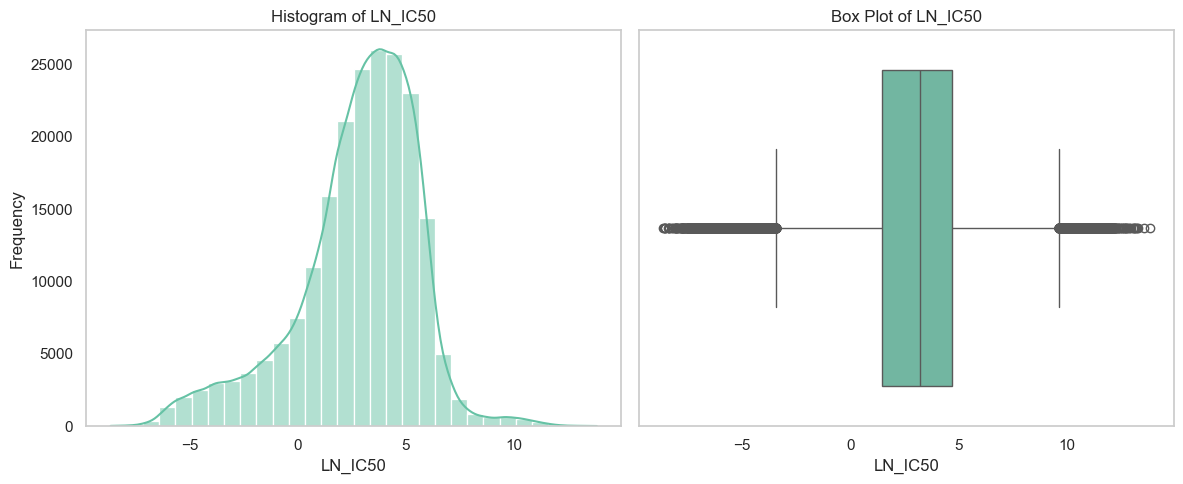

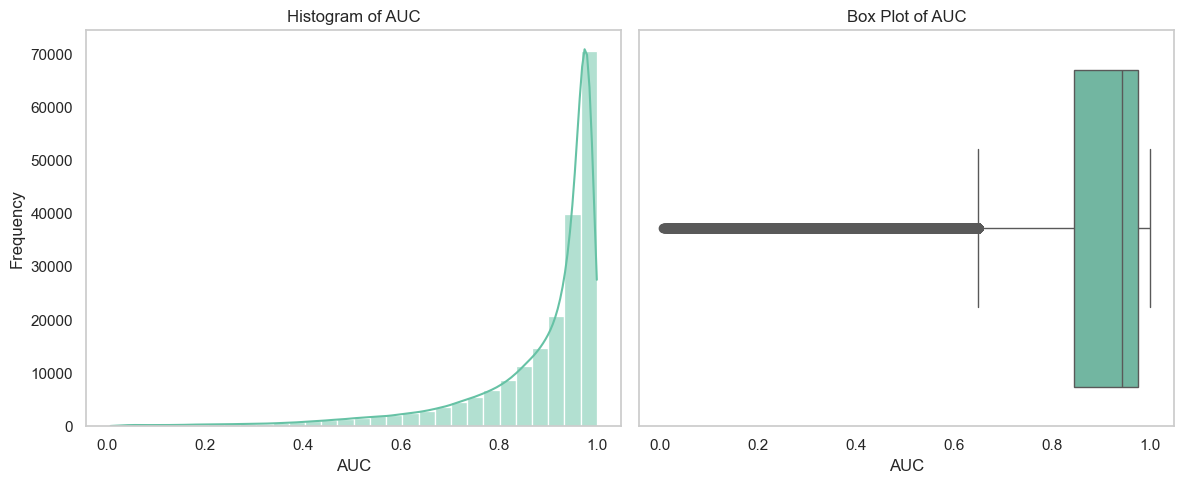

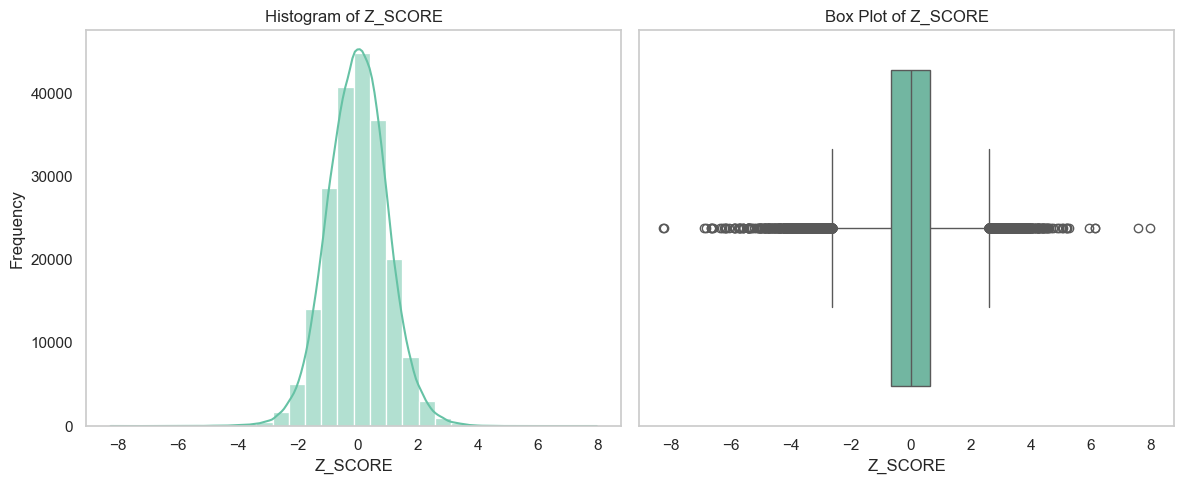

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a consistent visual style
sns.set(style="whitegrid", palette="Set2")

# List of sensitivity metrics
metrics = ['LN_IC50', 'AUC', 'Z_SCORE']

# Create subplots
for metric in metrics:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(GDSC_cleaned[metric], kde=True, bins=30)
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(False)

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=GDSC_cleaned[metric])
    plt.title(f'Box Plot of {metric}')
    plt.xlabel(metric)

    # Show plots
    plt.tight_layout()
    plt.grid(False)
    plt.show()


### Objective 1: Identify cancer-type-specific drug responses

C:\Users\Admin\AppData\Local\Temp\ipykernel_13460\1302685751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ln_ic50.index, y=mean_ln_ic50.values, palette='rocket')


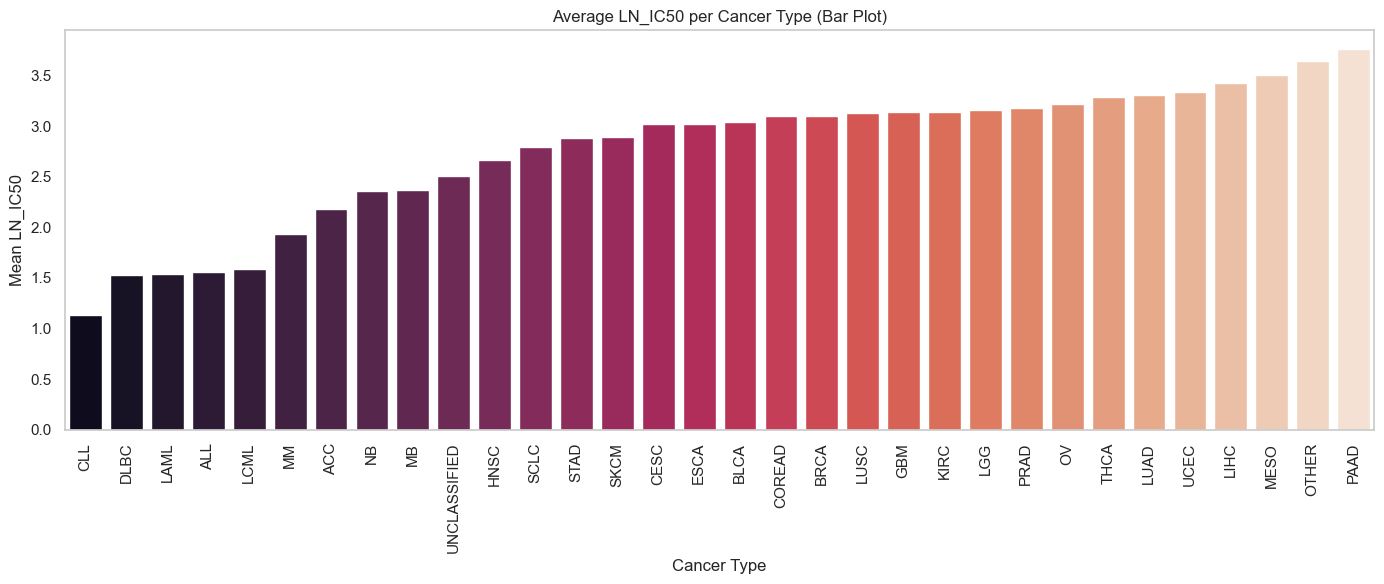

In [40]:
mean_ln_ic50 = GDSC_cleaned.groupby('TCGA_DESC')['LN_IC50'].mean().sort_values()

plt.figure(figsize=(14, 6))
sns.barplot(x=mean_ln_ic50.index, y=mean_ln_ic50.values, palette='rocket')
plt.xticks(rotation=90)
plt.title('Average LN_IC50 per Cancer Type (Bar Plot)')
plt.ylabel('Mean LN_IC50')
plt.xlabel('Cancer Type')
plt.tight_layout()
plt.savefig('Average LN_IC50 per Cancer type.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()


### **Key Findings**

Cancer types such as CLL (Chronic Lymphocytic Leukemia), DLBC (Diffuse Large B-cell Lymphoma), and LAML (Acute Myeloid Leukemia) showed the lowest average LN_IC50 values, indicating greater drug sensitivity. These results are consistent with clinical observations that hematologic malignancies typically respond well to chemotherapeutic agents. On the opposite end, PAAD (Pancreatic Adenocarcinoma), MESO (Mesothelioma), and LIHC (Liver Hepatocellular Carcinoma) had the highest average LN_IC50 values, suggesting lower sensitivity or higher resistance to the tested drugs. This aligns with the known treatment resistance of these cancers in clinical settings.
A clear distinction was observed between hematologic and solid tumors. Hematologic cancers clustered at the low end of the LN_IC50 spectrum, while many solid tumors fell on the higher end, highlighting tissue-specific drug response patterns.
The "UNCLASSIFIED" and "OTHER" categories fell near the mid-to-high LN_IC50 range, suggesting variability or heterogeneity in response, possibly due to mixed or poorly defined cancer types.

### **Implications for Drug Development**

Cancers with high LN_IC50 values represent therapeutic challenges and may benefit from:
Development of novel or targeted therapies,
Drug repurposing strategies and
Combination regimens to overcome resistance

### **Conclusion**

This analysis reveals critical differences in drug response across cancer types, emphasizing the need for tailored therapeutic strategies. It supports the pursuit of precision oncology, where treatment is customized based on the molecular and phenotypic characteristics of each cancer type.

### Objective 2: Explore the relationship between drug targets and genetic mutations

C:\Users\Admin\AppData\Local\Temp\ipykernel_13460\3824075337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pathway_response.index, y=pathway_response.values, palette='viridis')


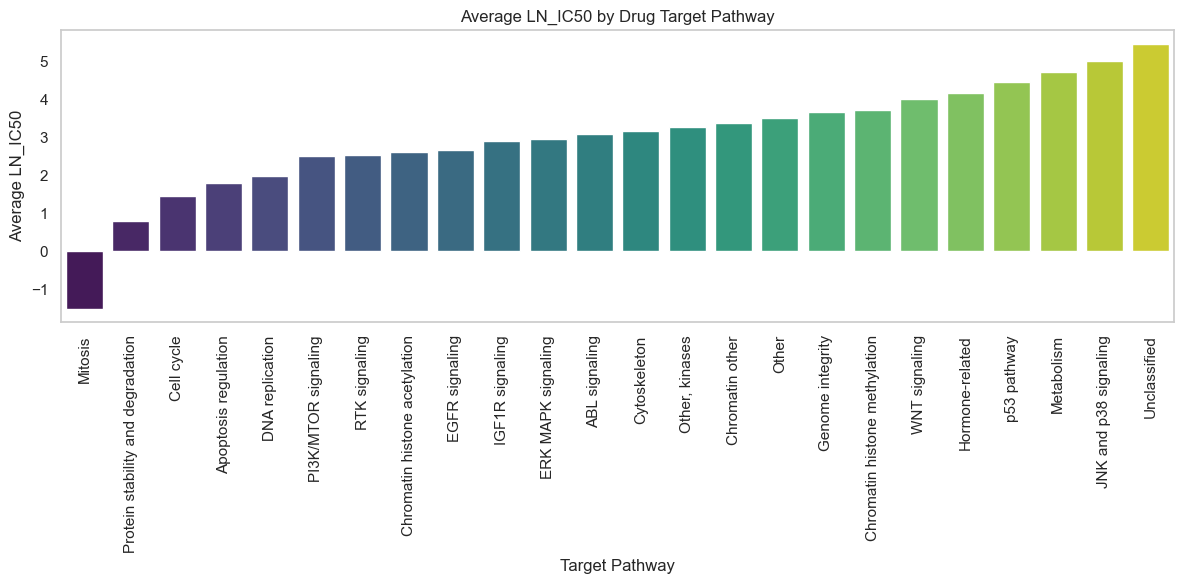

In [44]:
# Average LN_IC50 by target pathway
pathway_response = GDSC_cleaned.groupby('TARGET_PATHWAY')['LN_IC50'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=pathway_response.index, y=pathway_response.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average LN_IC50 by Drug Target Pathway')
plt.ylabel('Average LN_IC50')
plt.xlabel('Target Pathway')
plt.tight_layout()
plt.savefig('Average LN_IC50 by target pathway.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()


#### **Key Findings**

Drugs targeting mitosis, protein stability and degradation, and the cell cycle exhibited the lowest average LN\_IC50 values, indicating higher potency and effectiveness.These pathways are essential for cancer cell proliferation, making them attractive and historically validated drug targets.
Pathways such as PI3K/MTOR, RTK, EGFR, ERK MAPK, and IGF1R signaling showed moderate LN\_IC50 values, reflecting variable but generally favorable responses.Chromatin histone acetylation, an epigenetic modification, also fell within this middle range, suggesting potential for targeted therapy especially in combination regimens. Drug targets in JNK and p38 signaling, metabolism, and p53 pathway had the highest LN\_IC50 values, indicating lower sensitivity and greater resistance.
These may be compensatory or survival pathways, more resilient to drug perturbation, and may require multi-targeted strategies.
The "Unclassified" group had the highest average LN\_IC50, likely reflecting experimental agents or poorly characterized mechanisms of action**.

#### **Implications for Therapeutic Strategy**

* Cell cycle and mitosis inhibitors are promising for broad-spectrum anti-cancer effects.
* Signal transduction and epigenetic regulation pathways represent areas of therapeutic interest where sensitivity can be cancer-type specific.
* Targeting metabolism or stress-response pathways might be less effective in isolation and should be considered for synergistic combinations.

#### **Conclusion**

This pathway-level drug response analysis helps prioritize biological processes for drug development, providing a framework for precision oncology by matching cancer types with the most responsive pathways.


### Objective 3: Discover broad-spectrum anticancer drugs

C:\Users\Admin\AppData\Local\Temp\ipykernel_13460\706923474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=broad_spectrum.values, y=broad_spectrum.index, palette='crest')


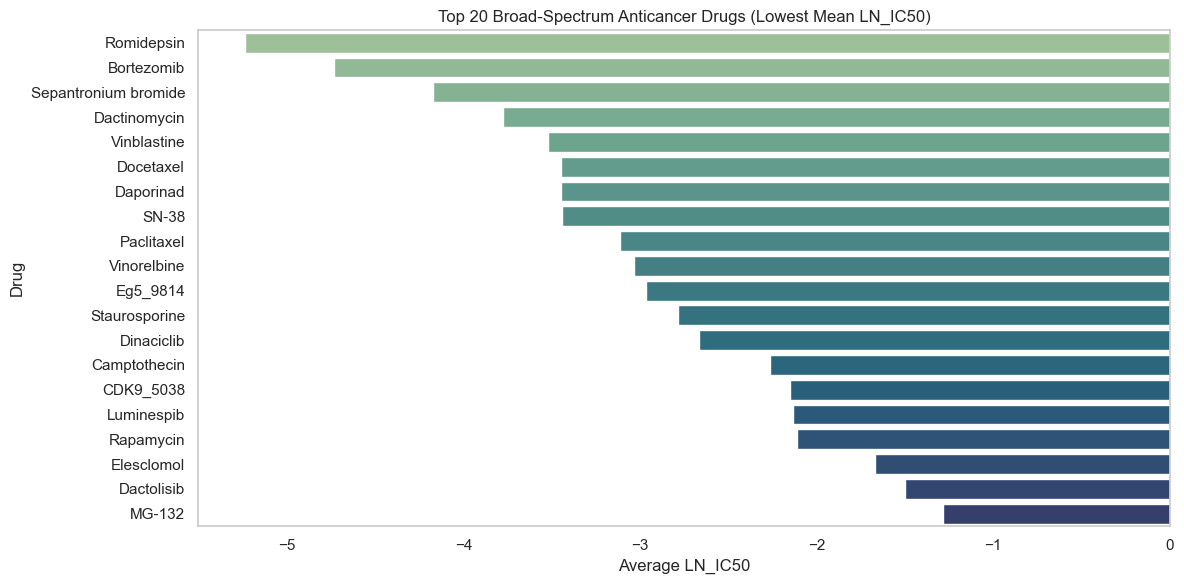

In [48]:
# Drugs with broad effectiveness (low LN_IC50)
broad_spectrum = GDSC_cleaned.groupby('DRUG_NAME')['LN_IC50'].mean().sort_values().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=broad_spectrum.values, y=broad_spectrum.index, palette='crest')
plt.title('Top 20 Broad-Spectrum Anticancer Drugs (Lowest Mean LN_IC50)')
plt.xlabel('Average LN_IC50')
plt.ylabel('Drug')
plt.tight_layout()
plt.savefig('Top 20 broad spectrum anticancer drugs.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()


 #### **Key Findings**

Romidepsin, Bortezomib, and Sepantronium bromide top the list with the lowest mean LN\_IC50 values, indicating exceptionally high efficacy across a wide range of cancer types.These drugs are known to target essential cellular mechanisms such as histone deacetylation, proteasome degradation, and surviving inhibition.
Many of the top drugs are:
      Microtubule inhibitors (e.g., Docetaxel, Vinorelbine, Paclitaxel, Vinblastine),
      Topoisomerase inhibitors(e.g., Dactinomycin, SN-38, Camptothecin), and
      Kinase inhibitors (e.g., Dinaciclib, CDK9\_5038, Dactolisib)

The list includes drugs acting on:
      Epigenetic regulators (e.g., Romidepsin),
      Proteasome function (e.g., Bortezomib, MG-132),
      Cell cycle and mitosis (e.g., Eg5\_9814, Staurosporine) and
      mTOR and HSP90 pathways(e.g., Rapamycin, Luminespib)

#### **Implications for Drug Repurposing and Development**

* These top-performing compounds are ideal candidates for broad-spectrum cancer therapy, especially in drug-resistant tumors or rare cancers with limited treatment options.
* They also present strong opportunities for **combination therapies or biomarker-guided trials.

#### **Conclusion**

This analysis identifies potent anticancer compounds with the potential for broad application across multiple cancer types, aiding in drug prioritization for preclinical studies or clinical translation.



### Objective 4: Detect patterns of resistance in tissues or cancer types

C:\Users\Admin\AppData\Local\Temp\ipykernel_13460\507438150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resistance.values, y=resistance.index, palette='flare')


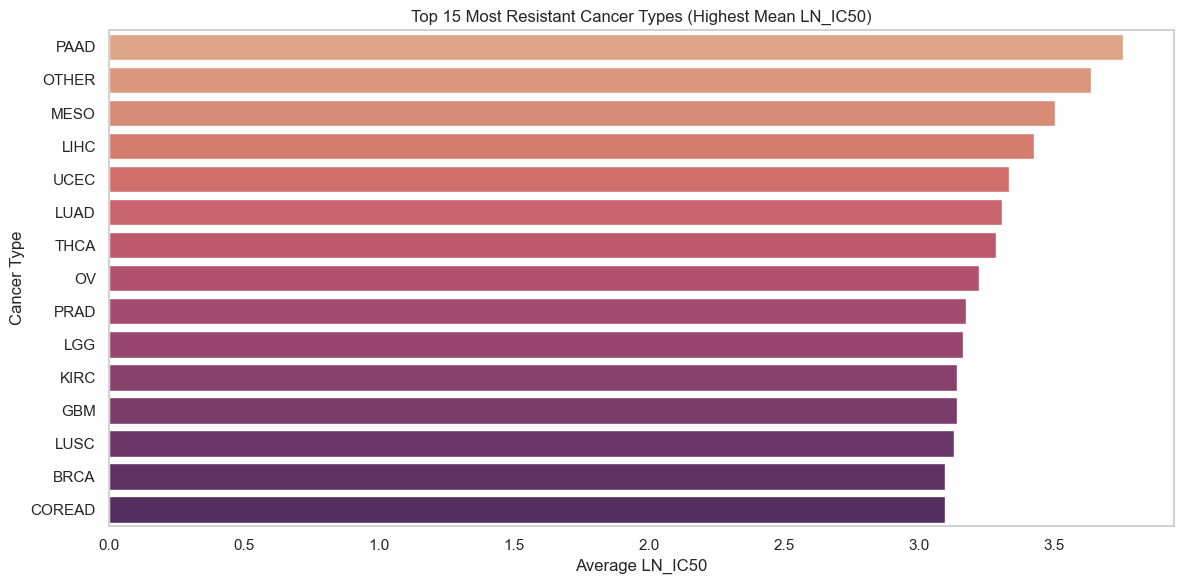

In [52]:
resistance = GDSC_cleaned.groupby('TCGA_DESC')['LN_IC50'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=resistance.values, y=resistance.index, palette='flare')
plt.title('Top 15 Most Resistant Cancer Types (Highest Mean LN_IC50)')
plt.xlabel('Average LN_IC50')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.savefig('Top 15 most resistant cancer types.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()


This visualization presents the **top 15 most resistant cancer types** based on their **average LN_IC50 values**. The LN_IC50 represents the natural logarithm of the IC50 value - a higher LN_IC50 indicates greater drug resistance.

### Key Findings:

**PAAD (Pancreatic adenocarcinoma)** recorded the **highest mean LN_IC50**, making it the most resistant cancer type to drug treatment. This aligns with clinical findings, as pancreatic cancer is often characterized by poor prognosis and limited treatment efficacy. **OTHER**, **MESO (Mesothelioma)**, **LIHC (Liver hepatocellular carcinoma)**, and **UCEC (Uterine corpus endometrial carcinoma)** closely followed PAAD in terms of resistance. These types may share features such as poor drug delivery or intrinsic molecular resistance mechanisms. Cancers such as **LUAD (Lung adenocarcinoma)**, **THCA (Thyroid carcinoma)**, and **OV (Ovarian cancer)** fall in the middle range of resistance. Their elevated LN_IC50 values suggest moderate resistance to therapeutics. **PRAD (Prostate adenocarcinoma)**, **LGG (Lower grade glioma)**, and **KIRC (Kidney renal clear cell carcinoma)** also made the list, suggesting the presence of resistant subtypes or limited response to standard treatments.The **least resistant** among the top 15 were **BRCA (Breast cancer)** and **COREAD (Colorectal adenocarcinoma)**. Although still in the top 15, their relatively lower LN_IC50 values indicate better responsiveness to treatments compared to the others.

### Conclusion:

The analysis highlights cancer types such as **PAAD, MESO, and LIHC** as the most drug-resistant, warranting further research into novel therapeutic strategies and drug formulations. The results can help inform **drug development priorities** and support **precision oncology** efforts by identifying cancer types that may benefit from targeted interventions or combination therapies.

Understanding these resistance patterns is crucial for optimizing treatment plans and improving patient outcomes, especially for the most resistant cancer types.


### Objective 5: Investigate relationship between sensitivity metrics

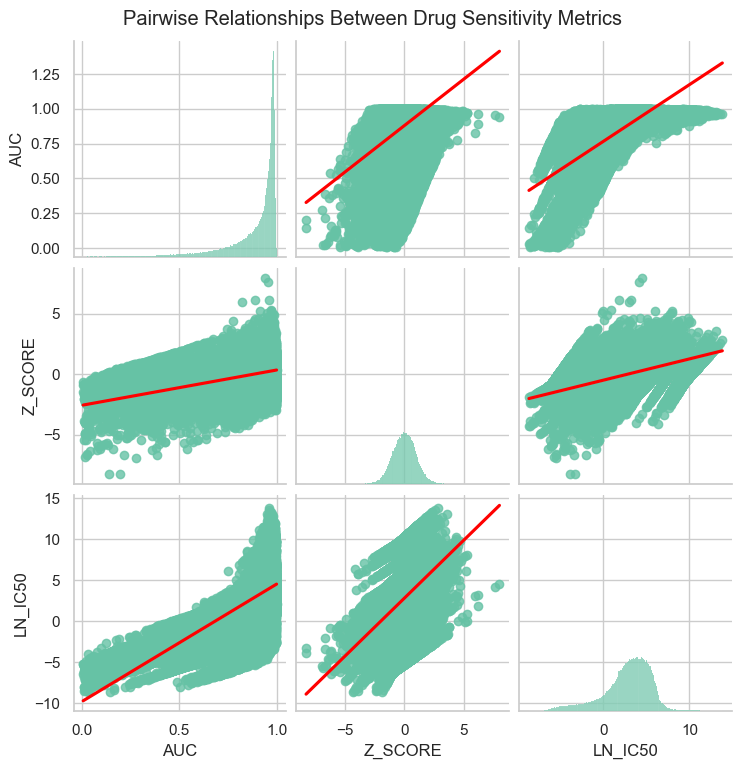

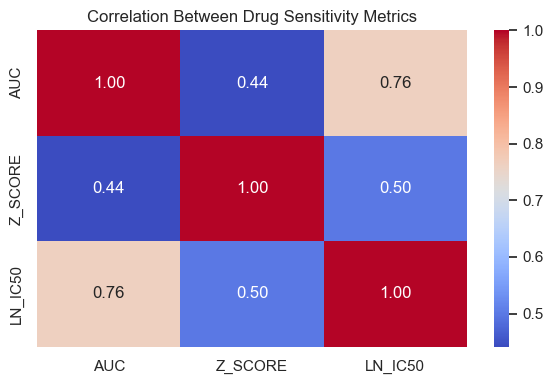

In [58]:
# Pair plot for AUC, Z_SCORE, LN_IC50
sns.pairplot(GDSC_cleaned[['AUC', 'Z_SCORE', 'LN_IC50']], kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle('Pairwise Relationships Between Drug Sensitivity Metrics', y=1.02)
plt.savefig('Pairwise Relationships Between Drug Sensitivity metrics.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(GDSC_cleaned[['AUC', 'Z_SCORE', 'LN_IC50']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Drug Sensitivity Metrics')
plt.tight_layout()
plt.savefig('Correlation between drug sensitivity metrics.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()


The heatmap above illustrates the **Pearson correlation coefficients** between three commonly used drug sensitivity metrics:

- **AUC (Area Under the Curve)**
- **Z_SCORE**
- **LN_IC50 (log-transformed half-maximal inhibitory concentration)**
  
### Key Findings:

- **AUC vs LN_IC50**:  
Correlation coefficient: **0.76**.This strong **positive correlation** implies that drugs with higher AUC values tend to also have higher LN_IC50 values. Both metrics reflect the **extent of resistance** — a high value in either typically indicates **lower sensitivity** to the drug.

- **Z_SCORE vs LN_IC50**:  
Correlation coefficient: **0.50**.This is a **moderate positive correlation**, suggesting that Z_SCORE and LN_IC50 capture some overlapping aspects of drug response but are not fully aligned. Z_SCORE may capture different biological or statistical dimensions, such as relative changes or standardized effects across different experimental conditions.

- **AUC vs Z_SCORE**:  
Correlation coefficient: **0.44**.The weakest relationship among the three pairs.This suggests that **AUC and Z_SCORE may quantify drug sensitivity in different ways**, and interpreting them together may provide **complementary insights** into drug response behavior.

### Conclusion:
While **AUC and LN_IC50** show strong agreement and can be used somewhat interchangeably to infer **drug resistance**, **Z_SCORE offers a different perspective** and might be better suited for detecting relative or standardized drug responses. The moderate to strong correlations support the idea that **multiple metrics should be considered** when assessing drug sensitivity, especially in **cancer pharmacogenomics** studies.These correlations also provide a rationale for using **LN_IC50 as a representative metric** in earlier objectives, as it balances interpretability and consistency with AUC while maintaining relevance to pharmacologic potency.

### Pairwise Relationships Between Drug Sensitivity Metrics

The pairplot displays the pairwise relationships between three drug sensitivity metrics: **AUC**, **Z_SCORE**, and **LN_IC50**. Each diagonal panel shows the distribution of a metric, while the off-diagonal panels display scatter plots with fitted regression lines to show linear trends.

#### **Distributions (Diagonal Panels)**

- **AUC** values are right-skewed and mostly concentrated between 0.5 and 1.0, indicating that many drugs produce a broad effect across concentrations.
- **Z_SCORE** values follow a roughly normal distribution centered around zero, consistent with its role as a standardized measure.
- **LN_IC50** values are bell-shaped, suggesting a typical range of drug potencies with some requiring higher or lower concentrations to inhibit cell growth.

#### **Pairwise Relationships (Off-Diagonal Panels)**

- **AUC vs LN_IC50**:
Strong positive linear relationship.As LN_IC50 increases (indicating greater drug resistance), AUC also increases (indicating a broader response area).These metrics are closely aligned and often reflect similar drug response patterns.

- **Z_SCORE vs LN_IC50**:
Moderate positive linear trend with more variability.Indicates Z_SCORE partially captures drug potency but includes additional variance from normalization across conditions or cell lines.

- **AUC vs Z_SCORE**:
Weakest visible correlation among the pairs.Suggests AUC and Z_SCORE measure different biological or statistical characteristics of drug response.

### Insights and Conclusion

**AUC and LN_IC50** are **strongly correlated**, indicating some level of redundancy. Both effectively measure drug resistance or potency. **Z_SCORE** provides **complementary information** and is useful in comparative analyses, particularly when normalizing across diverse experimental conditions. Using a combination of these metrics is **recommended** to gain a more comprehensive view of drug sensitivity, especially in pharmacogenomics and personalized medicine research. This pairplot provides a visual confirmation of the earlier heatmap's correlation matrix. It shows that while AUC and LN_IC50 are strongly aligned and reflect similar aspects of drug resistance, Z_SCORE brings in an additional layer of insight that can’t be captured by those two alone.

